In [167]:

#LIBRARY TO USE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style 
style.use('seaborn-bright')
import seaborn as sns


In [168]:
master = pd.read_csv("master.csv")

In [169]:
extra = pd.read_csv("extra_questions_withID.csv")

In [170]:
#extra

In [171]:
mergedf = master.merge(extra.iloc[:, [0] + list(range(42, 56))], how='inner', on='RespondentId')

In [172]:
mergedf

,Unnamed: 0,X,RespondentId,Enroll,Employ,Working,Hrs,Age,Ethnicity,Income,...,DiffLvlFA,ChallFA,EmergFood,DiffConcentrate,DelayComplDegree,TimeDelayComplDegree,RateMentalHealth,AttendProtest,AttendLocalComm,PoliticMess
0,26832,NaN,95772100,Full-time,Part-time,Off campus,More than 19 hours,NaN,1,"Less than $10,000",...,A little difficult,1 4,NaN,Almost every day,"Yes, by 2 semesters or more",Often,Poor,Never,Never,Never
1,26833,NaN,95772104,Full-time,No,NaN,NaN,2.0,1,"$30,000 to $39,999",...,Moderately difficult,1,4,About once a week,No,Never,Good,Never,Never,Several times
2,26834,NaN,95772110,Full-time,Full-time,Off campus,More than 19 hours,NaN,1,"$90,000 to $99,999",...,A little difficult,1,NaN,About once a week,"Yes, by 2 semesters or more",Sometimes,Fair,Never,Never,Never
3,26835,NaN,95772115,Full-time,Full-time,Off campus,More than 19 hours,NaN,1,"$20,000 to $29,999",...,Moderately difficult,1 2,NaN,About once a week,"Yes, by 1 semester",Sometimes,Good,Never,Never,Once
4,26836,NaN,95772121,Full-time,Part-time,Both,More than 19 hours,NaN,1,"$30,000 to $39,999",...,A little difficult,1 2 3,3 4,Almost every day,"Yes, by 2 semesters or more",Often,Fair,Never,Once,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,28570,NaN,95997981,Full-time,Part-time,On campus,19 hours or less,NaN,1,"$70,000 to $79,999",...,I am not sure,1 2 5,NaN,Never,No,Sometimes,Good,Never,Several times,Several times
1739,28571,NaN,96000664,Full-time,Part-time,Off campus,19 hours or less,NaN,1,"$100,000 or more",...,I am not sure,1,NaN,Never,No,Never,Vert Good,Once,Once,NaN
1740,28572,NaN,96001101,Part-time,Part-time,Both,More than 19 hours,NaN,1,"$10,000 to $19,999",...,Not difficult at all,1 3,NaN,Never,No,Never,Good,Never,Never,Never
1741,28573,NaN,96001710,Full-time,Full-time,Off campus,More than 19 hours,NaN,11,"$100,000 or more",...,Not difficult at all,1,NaN,Never,No,Never,Good,Never,Once,Once


In [173]:
mergedf.shape

(1743, 73)

In [174]:
FA = mergedf['FedAid']

In [175]:
#FA

In [176]:
FS = mergedf['USDAcat']

In [177]:
FS

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1738    NaN
1739    NaN
1740    NaN
1741    NaN
1742    NaN
Name: USDAcat, Length: 1743, dtype: object

In [178]:
# Create two data frames

df1 = pd.DataFrame({'USDAcat': ['Low FS', 'Marginal/High FS','Very Low FS']})
df2 = pd.DataFrame({'FedAid': ['Emergency Loan','Grants','Loans','Other', 'Scholarship','UTEPs CARES Act', 'Work-study']})




In [179]:
# Combine the two data frames using a left join on the index

#combined_df = df1.join(df2, how='')

In [180]:
# Print the combined data frame
print(combined_df)

            USDAcat          FedAid
0            Low FS  Emergency Loan
1  Marginal/High FS          Grants
2       Very Low FS           Loans


In [181]:
df1

,USDAcat
0,Low FS
1,Marginal/High FS
2,Very Low FS


In [182]:
df2

,FedAid
0,Emergency Loan
1,Grants
2,Loans
3,Other
4,Scholarship
5,UTEPs CARES Act
6,Work-study


In [183]:
#master_USDAcat = master.loc[:,"USDAcat"]

In [184]:
#master_USDAcat''

#### How is use of government federal aid/assistance associated with food insecurity as measured by the USDA index or categories?

In [185]:
FA = master['FedAid']
FS =master['USDAcat']
merge = pd.concat([FA,FS], axis=1)
grouped = merge.groupby(['USDAcat', 'FedAid']).size().reset_index(name='count')
pivot = grouped.pivot(index='USDAcat', columns = 'FedAid', values ='count')

pivot=pivot.fillna(0)
##

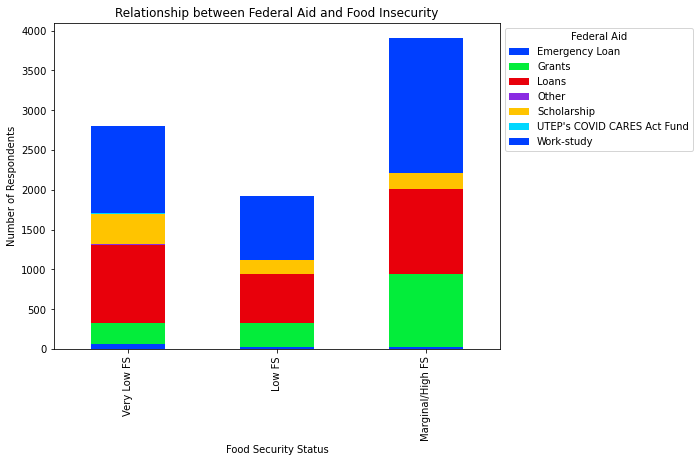

In [186]:

# sort the columns alphabetically
pivot = pivot.reindex(sorted(pivot.columns), axis=1)

# define a custom sorting function
def custom_sort(label):
    if 'V' in label:
        return 0
    elif 'L' in label:
        return 1
    elif 'M' in label:
        return 2
    else:
        return 3

# sort the index using the custom function
pivot = pivot.iloc[pivot.index.map(custom_sort).argsort()]

# plot the stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(8,6))

# set plot properties
plt.title('Relationship between Federal Aid and Food Insecurity')
plt.xlabel('Food Security Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Federal Aid', bbox_to_anchor=(1, 1))
plt.show()



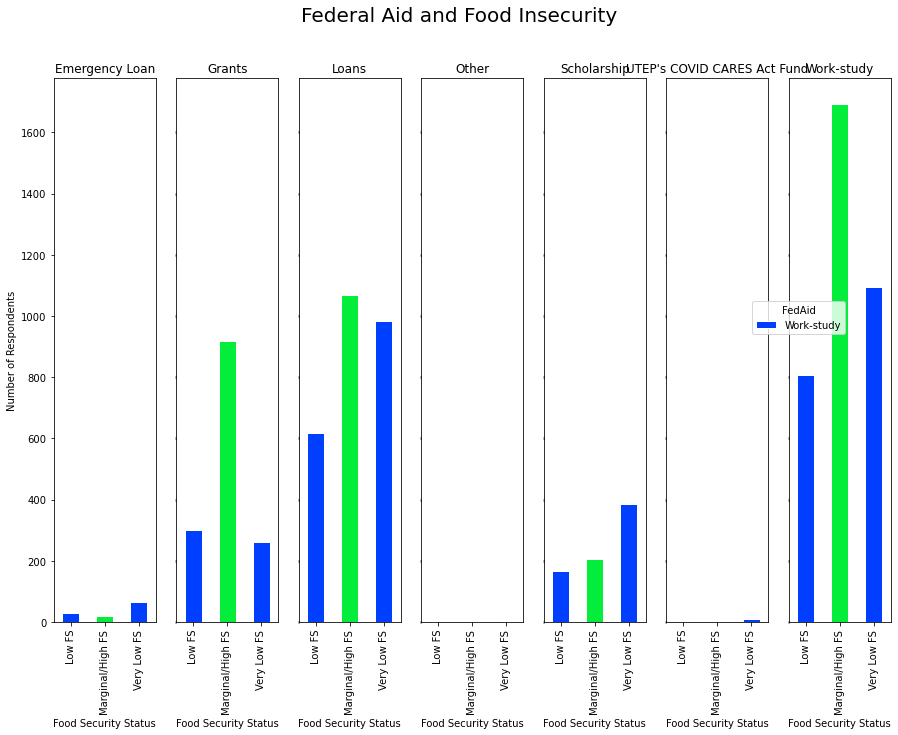

In [187]:
FA = master['FedAid']
FS =master['USDAcat']
merge = pd.concat([FA,FS], axis=1)
grouped = merge.groupby(['USDAcat', 'FedAid']).size().reset_index(name='count')
pivot = grouped.pivot(index='USDAcat', columns = 'FedAid', values ='count')

##
pivot=pivot.fillna(0)
fig, axs = plt.subplots(1, len(pivot.columns), figsize=(15,10), sharey=True)


for i, col in enumerate(pivot.columns):
    pivot[col].plot(kind='bar', ax=axs[i], legend=False, color=['C0', 'C1'], edgecolor='white')
    axs[i].set_title(col)
    axs[i].set_xlabel('Food Security Status')
    if i == 0:
        axs[i].set_ylabel('Number of Respondents')
    else:
        axs[i].set_ylabel('')
        axs[i].tick_params(axis='y', which='both', length=.8,width=2.5)

# set plot properties
fig.suptitle('Federal Aid and Food Insecurity', fontsize=20)
plt.legend(title='FedAid', bbox_to_anchor=(.6, .6))
plt.show()

In [188]:
pivot

FedAid,Emergency Loan,Grants,Loans,Other,Scholarship,UTEP's COVID CARES Act Fund,Work-study
USDAcat,,,,,,,
Low FS,30.0,299.0,617.0,0.0,166.0,2.0,806.0
Marginal/High FS,19.0,919.0,1068.0,0.0,205.0,1.0,1692.0
Very Low FS,64.0,262.0,985.0,2.0,384.0,11.0,1096.0


Low FS
Marginal/High FS
Very Low FS


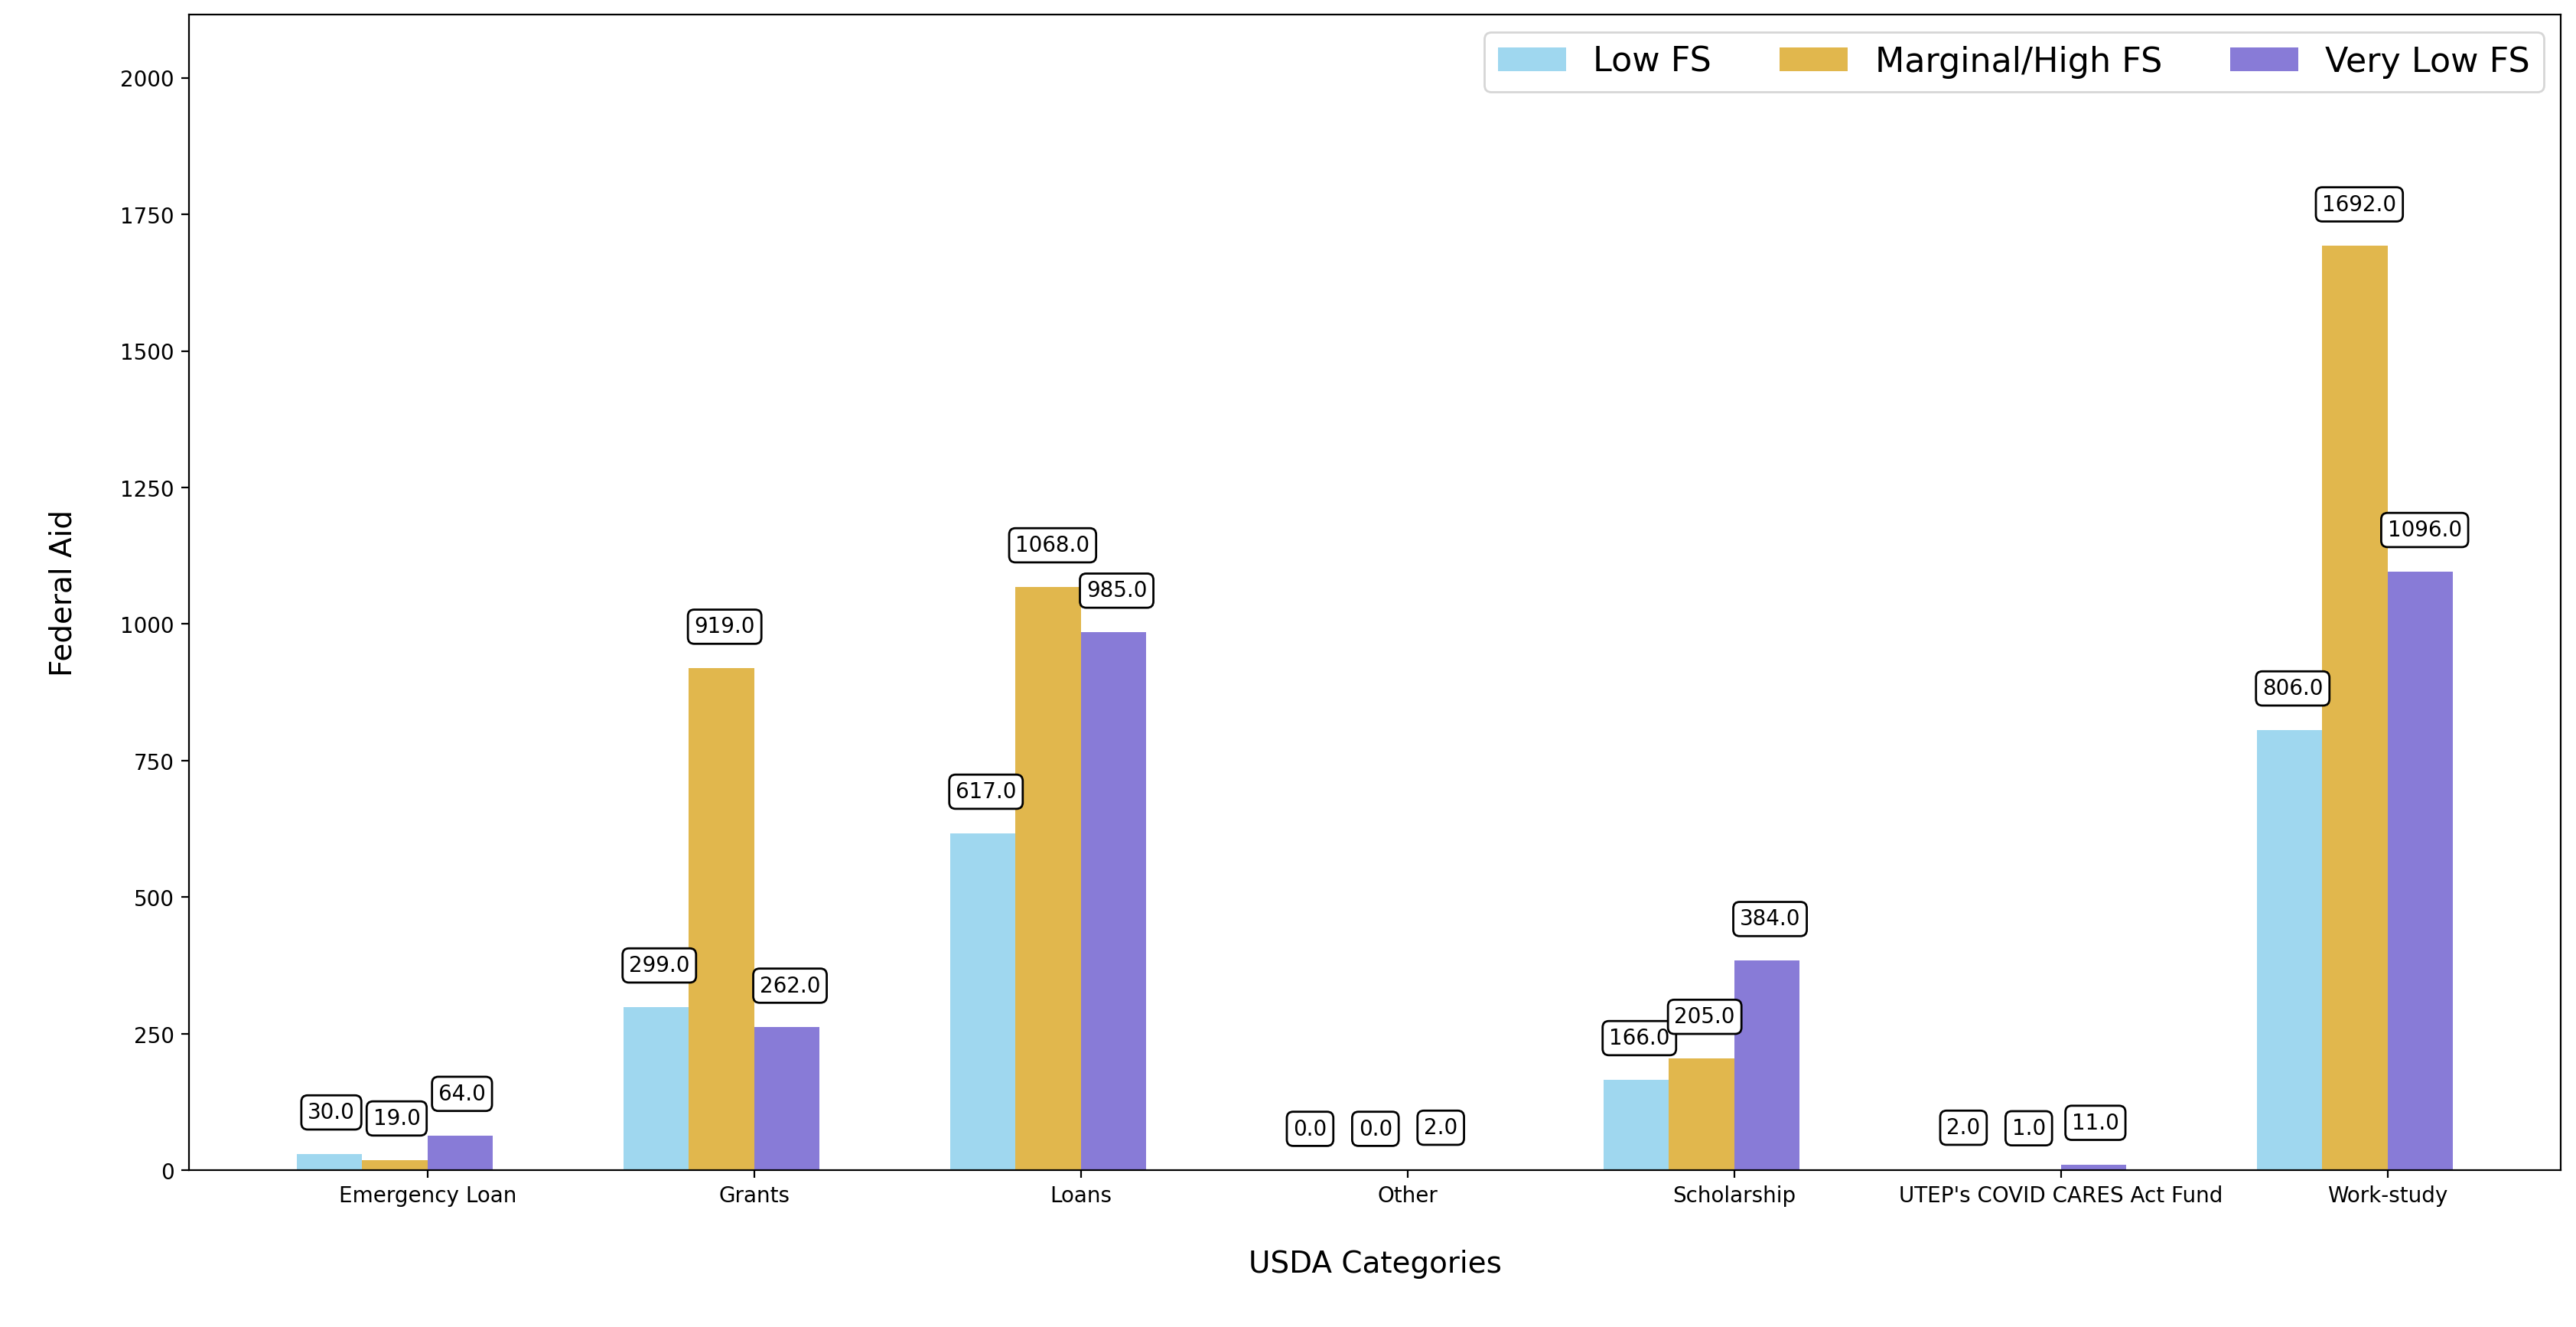

In [189]:
# df_grouped = data_df_count.pivot(index='USDAcat', columns='FedAid').reindex().fillna(0)
# df_grouped.columns = df_grouped.columns.get_level_values(1)
# df = df_grouped
# display(df_grouped)
# set the figure size

df = pivot.fillna(0).T.copy()
fig, ax = plt.subplots(figsize = (20,10), dpi = 200)

# select the colors you would like to use for each category
colors = ['skyblue','goldenrod','slateblue','seagreen', 'green', 'orange', 'purple']

# used to set the title, y, and x labels
# ax.set_title('\nF\n', fontsize = 14)
ax.set_xlabel('\nUSDA Categories\n', fontsize = 14)
ax.set_ylabel('\nFederal Aid\n', fontsize = 14)

# create an offsetting x axis to iterate over within each group
x_axis = np.arange(len(df))+1 

# center each group of columns
offset = -0.3                 

# iterate through each set of values and the colors associated with each 
# category
for index, col_name, color in zip(x_axis, df.columns, colors):
    print(col_name)
    
    x = x_axis+offset
    height = df[col_name].values

    ax.bar(
        x, 
        height, 
        width = 0.2, 
        color = color, 
        alpha = 0.8, 
        label = col_name
    )   
    
    offset += 0.2
    
    # set the annotations
    props = dict(boxstyle='round', facecolor='white', alpha=1)
    
    for horizontal, vertical in zip(x, height):
        
        ax.text(
            horizontal-len(str(vertical))/60, 
            vertical+65, 
            str(vertical), 
            fontsize=10, 
            bbox=props)
        

# set the y limits so the legend appears above the bars
ax.set_ylim(0, df.to_numpy().max()*1.25)

# relabel the x axis
ax.set_xticks(x_axis)                   # offset values
ax.set_xticklabels(df.index.to_list())  # set the labels for each group

# the legend can be set to multiple values. 'Best' has Matplotlib automatically set the location.
# setting ncol to the length of the dataframe columns sets the legend horizontally by the length 
# of the columns

plt.legend(loc = 'best', ncol=len(df.columns), fontsize = 16)                        
plt.show()

In [190]:
data_df_count['logCount'] = np.log(data_df_count['Count'])
data_df_count.head()

NameError: name 'data_df_count' is not defined

#Does food insecurity (as measured by USDA index or categories) have a relationship with the items pertaining to concentration on school and degree progress/completion?


In [191]:
import seaborn as sns

sns.color_palette()
ax = sns.violinplot(data=data_df_count, y="FedAid", x="logCount", hue="FedAid")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

NameError: name 'data_df_count' is not defined

#Are there gender or ethnicity differences in the items pertaining to concentration on school and degree progress/completion?


